<a href="https://colab.research.google.com/github/LukichevaPolina/da_methods_lab1/blob/main/K_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/23MAG_HW_1_v3.xls'
data = pd.read_excel(file_path)

# Display basic info and first few rows of the data
data_info = data.info()
data_head = data.head()

(data_info, data_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   37      48 non-null     float64
 1   1       48 non-null     float64
 2   7400    48 non-null     float64
 3   9       48 non-null     float64
 4   7000    48 non-null     float64
 5   70000   48 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


(None,
    37     1        7400   9        7000      70000
 0   45.0    3.0  33100.0   12.0  34000.0  337000.0
 1    NaN    1.0  18700.0    5.0  17000.0  176000.0
 2   39.0    2.0  29100.0    9.0  29000.0  289000.0
 3   33.0    1.0  11400.0    6.0  10000.0  104000.0
 4   28.0    1.0  20100.0    NaN  18000.0  184000.0)

In [ ]:
# Renaming the columns
column_names = [
    "Age", "Number_of_Dependents", "Income",
    "Residence_Length", "Car_Valuation", "Loan_Amount"
]
data.columns = column_names
data.head()

,Age,Number_of_Dependents,Income,Residence_Length,Car_Valuation,Loan_Amount
0,45.0,3.0,33100.0,12.0,34000.0,337000.0
1,NaN,1.0,18700.0,5.0,17000.0,176000.0
2,39.0,2.0,29100.0,9.0,29000.0,289000.0
3,33.0,1.0,11400.0,6.0,10000.0,104000.0
4,28.0,1.0,20100.0,NaN,18000.0,184000.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   48 non-null     float64
 1   Number_of_Dependents  48 non-null     float64
 2   Income                48 non-null     float64
 3   Residence_Length      48 non-null     float64
 4   Car_Valuation         48 non-null     float64
 5   Loan_Amount           48 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


##Данные. Выполнить первичную обработку данных. Сделать первые выводы.
1. Рассмотрите данные и вычислите основные характеристики признаков: среднее, стандартное отклонение, медиана, квартили.  Постройте гистограммы признаков и блок диаграммы  признаков. Сделайте первые выводы о возможном распределении признаков.


In [ ]:
# Calculating basic statistical properties
basic_statistics = data.describe().T
basic_statistics['median'] = data.median()
basic_statistics

,count,mean,std,min,25%,50%,75%,max,median
Age,48.0,39.354167,9.068274,19.0,33.0,39.5,45.0,59.0,39.5
Number_of_Dependents,48.0,2.041667,1.030561,0.0,1.0,2.0,3.0,4.0,2.0
Income,48.0,19552.083333,9931.317103,2000.0,9875.0,19800.0,28575.0,38600.0,19800.0
Residence_Length,48.0,10.270833,4.845439,0.0,7.0,10.0,13.0,22.0,10.0
Car_Valuation,48.0,21833.333333,11180.022710,0.0,12750.0,23000.0,29250.0,50000.0,23000.0
Loan_Amount,48.0,201666.666667,99842.073878,3000.0,108250.0,196500.0,291000.0,382000.0,196500.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

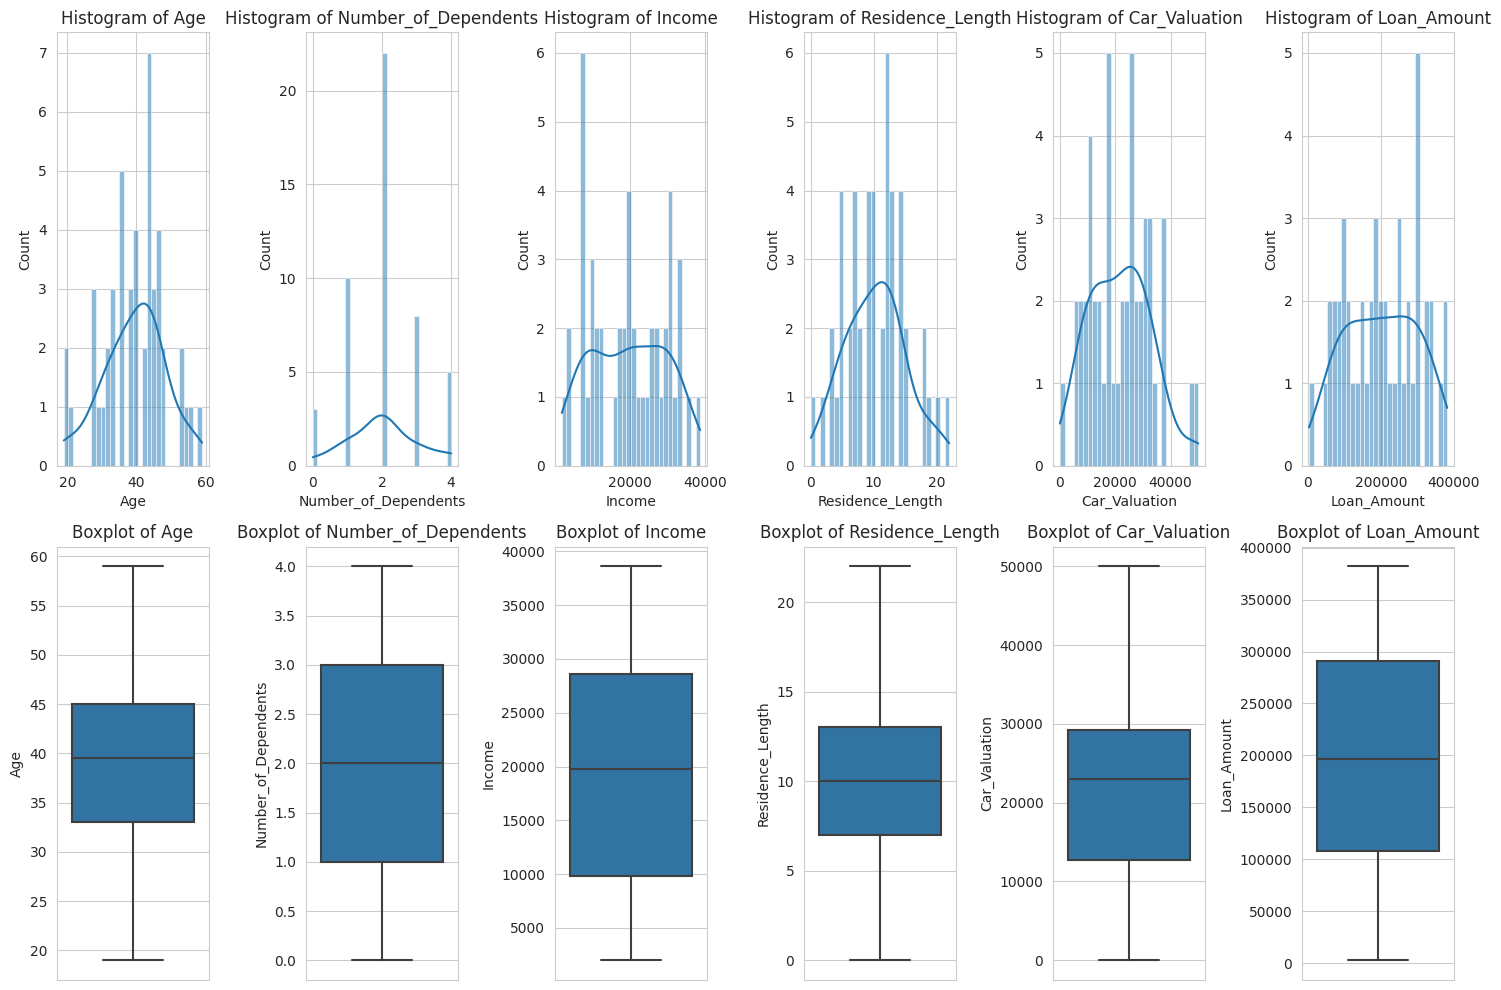

In [ ]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
col_number = len(data.columns)

# Create subplots: 2 columns (histograms and boxplots)
for i, column in enumerate(data.columns, 1):
    plt.subplot(2, col_number, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(2, col_number, i + col_number)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

### TODO: rewrite
*Гистограммы:
Возраст: Выглядит несколько равномерно распределенным.
Количество иждивенцев: У большинства клиентов есть 1 или 2 иждивенца.
Доход: распределение с правым перекосом, с пиком в более низком диапазоне доходов.
Длина жилища: Слегка скошена вправо.
Оценка автомобиля: Слегка смещена влево с пиком в более высоких оценках.
Сумма кредита: Отображается с перекосом вправо, много небольших займов.
Коробочный график:
Отклонения видны в разделах "Доход", "Продолжительность проживания" и "Сумма кредита".
Некоторые характеристики, такие как "Количество иждивенцев" и "Продолжительность проживания", имеют относительно компактный межквартильный диапазон (IQR), что означает, что большинство точек данных близки к медиане.*

2. В данных есть пропуски. Подберите из литературы метод восстановления пропущенных данных и заполните пропуски по этому методу.

*Пропущенные значения в данных были заполненны с помощью линейной регрессии. Похожие объекты должны иметь похожие признаки, поэтому можно предсказать недостающие значения на основе других признаков.*  
*Для каждого признака линейная регрессия учится на запоненных данных и предсказывает пропущенные. Еще не обработанные признаки, не являющиеся целевыми на данном шаге, заполняются медианными значениями.*
### TODO: поудмать насколько это вменяемый подход

In [ ]:
# Creating a copy of the data for median imputation
data_median_imputed = data.copy()

# Impute missing values with median
for column in data.columns:
    data_median_imputed[column].fillna(data[column].median(), inplace=True)

# Checking if there are any missing values left in the median-imputed data
missing_values_median_imputed = data_median_imputed.isnull().sum()


In [ ]:
missing_values_median_imputed

Age                     0
Number_of_Dependents    0
Income                  0
Residence_Length        0
Car_Valuation           0
Loan_Amount             0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

# Clear warnings about changing
# "A value is trying to be set on a copy of a slice from a DataFrame."
pd.options.mode.chained_assignment = None

# Creating a copy of the data for linear regression imputation
data_linreg_imputed = data.copy()

# Function to impute missing values using linear regression
def linear_regression_impute(data, target_col, median_imputed_data):
    # Creating datasets: one with missing values and one without
    missing_data = data[data[target_col].isnull()]
    non_missing_data = data.dropna(subset=[target_col])

    # Defining predictors and target
    predictors = non_missing_data.drop(columns=[target_col])
    target = non_missing_data[target_col]

    # Handling missing values in predictors using median imputed data
    predictors.fillna(median_imputed_data, inplace=True)
    missing_data.fillna(median_imputed_data, inplace=True)

    # Fitting the linear regression model
    model = LinearRegression()
    model.fit(predictors, target)

    # Predicting and imputing the missing values
    predicted_values = model.predict(missing_data.drop(columns=[target_col]))
    data.loc[data[target_col].isnull(), target_col] = predicted_values

    return data

# Applying the function to each column with missing values
for column in data.columns:
    if data[column].isnull().sum() > 0:  # Check if there are missing values
        data_linreg_imputed = linear_regression_impute(data_linreg_imputed, column, data_median_imputed)

data_linreg_imputed.head()

,Age,Number_of_Dependents,Income,Residence_Length,Car_Valuation,Loan_Amount
0,45.000000,3.0,33100.0,12.000000,34000.0,337000.0
1,31.517625,1.0,18700.0,5.000000,17000.0,176000.0
2,39.000000,2.0,29100.0,9.000000,29000.0,289000.0
3,33.000000,1.0,11400.0,6.000000,10000.0,104000.0
4,28.000000,1.0,20100.0,3.504593,18000.0,184000.0


In [ ]:
# Checking if there are any missing values left in the linear regression imputed data
missing_values_linreg_imputed = data_linreg_imputed.isnull().sum()
missing_values_linreg_imputed

Age                     0
Number_of_Dependents    0
Income                  0
Residence_Length        0
Car_Valuation           0
Loan_Amount             0
dtype: int64

3. В данных возможны выбросы. Подберите из литературы метод определения выбросов и удалите объекты, идентифицированные как выбросы по этому методу.


*Боксплоты способны отображать выбросы. Согласно документации, границы выбросов определяются следующим образом:*  
IQR = Q3 - Q1  
Q1 - 1.5 * IQR  
Q3 + 1.5 * IQR

*По построенным в пункте 1 графикам можно сделать вывод о том, что ни один из признаков выбросов не имеет.*  

*Однако, графики построены до заполнения пропущенных значений. Попробуем обнаружить выбросы на подготовленных данных.*

а. IQR - Межквартильный размах  
Первым используем тот же способ, который применяется в боксплотах.

In [ ]:
# Identifying outliers using IQR Method
outliers_iqr = []

# Calculate IQR and identify outliers for each column
for column in data_linreg_imputed.columns:
    Q1 = data_linreg_imputed[column].quantile(0.25)
    Q3 = data_linreg_imputed[column].quantile(0.75)
    IQR = Q3 - Q1

    # Defining outliers
    outliers_condition = (data_linreg_imputed[column] < (Q1 - 1.5 * IQR)) | (data_linreg_imputed[column] > (Q3 + 1.5 * IQR))
    outliers = data_linreg_imputed[outliers_condition].index.tolist()

    # Appending identified outliers to the list
    outliers_iqr.extend(outliers)

# Removing duplicate indexes
outliers_iqr = list(set(outliers_iqr))

# Displaying the outlier data points
outliers_data_iqr = data_linreg_imputed.loc[outliers_iqr].sort_index()

print("Outliers num:", len(outliers_iqr))
outliers_data_iqr


Outliers num: 0


,Age,Number_of_Dependents,Income,Residence_Length,Car_Valuation,Loan_Amount


В данных, пропуски в которых были заполнены с помощью линейной регересии, данный подход не выявил выбросов. Это значит, что никакие признаки не раположены за пределами 1.5 межквартильных размахов за первым и третьим квартилями.


*б. Z-score - это значение показывающее на сколько средних квадратических отклонений значение отличается от среднего. Отнсем к выбросам те значения, которые находятся за пределами 3х станданртных отклонений от медианы(?).*

### TODO: понять надо ли так много способов определения *выбросов*

In [ ]:
from scipy.stats import zscore
import numpy as np

# Calculating Z-scores
z_scores = np.abs(zscore(data_linreg_imputed))

# Identifying outliers
z_threshold = 3  # Commonly used Z-score threshold for identifying outliers
outliers_z_score = np.where(z_scores > z_threshold)

# Displaying the outlier data points
outliers_data_z_score = data_linreg_imputed.iloc[outliers_z_score[0]].copy()
outliers_data_z_score['OutlierFeature'] = data.columns[outliers_z_score[1]]
outliers_data_z_score.sort_index(inplace=True)

print("Outliers num:", len(np.unique(outliers_z_score[0])))
outliers_data_z_score

Outliers num: 0


,Age,Number_of_Dependents,Income,Residence_Length,Car_Valuation,Loan_Amount,OutlierFeature


Используя метод Z-Score с пороговым значением 3, не было выявлено никаких отклонений. Это означает, что все точки данных находятся в пределах 3 стандартных отклонений от среднего значения (? или медианы) соответствующего признака.

### TODO: разобрать что это такое. если бы мы знали что это такое но мы не знаем что это такое

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_median_imputed)

# Applying DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)

# Identifying outliers: data points assigned to cluster -1 are considered outliers
outliers_dbscan = np.where(clusters == -1)

# Displaying the outlier data points
outliers_data_dbscan = data_median_imputed.iloc[outliers_dbscan].sort_index()

# Number of outliers detected by DBSCAN
num_outliers_dbscan = len(outliers_data_dbscan)

(outliers_data_dbscan, num_outliers_dbscan)


(     Age  Number_of_Dependents   Income  Residence_Length  Car_Valuation  \
 1   39.5                   1.0  18700.0               5.0        17000.0   
 3   33.0                   1.0  11400.0               6.0        10000.0   
 4   28.0                   1.0  20100.0              10.0        18000.0   
 10  38.0                   2.0  38600.0               8.0        38000.0   
 13  21.0                   3.0   8200.0              11.0        48000.0   
 15  38.0                   2.0  19600.0               9.0        19000.0   
 19  44.0                   3.0  19800.0              12.0        37000.0   
 20  19.0                   0.0  17600.0               0.0        13000.0   
 22  31.0                   0.0   6900.0               5.0        23000.0   
 23  29.0                   1.0  20300.0               3.0        18000.0   
 25  43.0                   2.0  18900.0              12.0        20000.0   
 28  27.0                   0.0  16900.0               2.0        14000.0   

Метод DBSCAN идентифицировал 20 точек данных как выбросы в данных, рассчитанных по медиане.

In [ ]:
# Creating a DataFrame to store the results of the experiments
experiment_results = []

# Trying different values for eps and min_samples
eps_values = [0.5, 1, 1.5, 2, 2.5, 3]
min_samples_values = [3, 5, 7, 10, 12]

# Performing experiments
for eps in eps_values:
    for min_samples in min_samples_values:
        # Applying DBSCAN with the current parameter values
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data_scaled)

        # Identifying outliers and counting them
        num_outliers = np.sum(clusters == -1)

        # Storing the results
        experiment_results.append((eps, min_samples, num_outliers))

# Converting the results to a DataFrame
experiment_results_df = pd.DataFrame(experiment_results, columns=['eps', 'min_samples', 'num_outliers'])

experiment_results_df


,eps,min_samples,num_outliers
0,0.5,3,41
1,0.5,5,51
2,0.5,7,51
3,0.5,10,51
4,0.5,12,51
5,1.0,3,10
6,1.0,5,20
7,1.0,7,32
8,1.0,10,51
9,1.0,12,51


In [ ]:
# Applying DBSCAN with chosen parameters
dbscan = DBSCAN(eps=2.0, min_samples=10)
clusters = dbscan.fit_predict(data_scaled)

# Identifying outliers
outliers_dbscan = np.where(clusters == -1)

# Displaying the outlier data points
outliers_data_dbscan = data_median_imputed.iloc[outliers_dbscan].sort_index()

# Creating a dataset without the identified outliers
data_no_outliers = data_median_imputed.drop(index=outliers_data_dbscan.index)

# Summary: Number of outliers and shape of the data without outliers
(num_outliers_dbscan, data_no_outliers.shape, outliers_data_dbscan)

(20,
 (44, 6),
      Age  Number_of_Dependents   Income  Residence_Length  Car_Valuation  \
 13  21.0                   3.0   8200.0              11.0        48000.0   
 14  54.0                   4.0  21700.0              19.0        25000.0   
 17  56.0                   4.0  20700.0              20.0        24000.0   
 32  53.0                   4.0  20000.0              18.0        23000.0   
 40  19.0                   2.0   8000.0              12.0        50000.0   
 46  59.0                   4.0  19800.0              22.0        23000.0   
 48  53.0                   4.0  23500.0              18.0        26000.0   
 
     Loan_Amount  
 13     250000.0  
 14     236000.0  
 17     229000.0  
 32     217000.0  
 40     200000.0  
 46     216000.0  
 48     196500.0  )

## Снижение размерности. Метод PCA (Principal Component Analysis=метод главных компонент).
4. Выполнить центрирование данных и такую нормировку, что евклидова норма каждого признака равна 1 (полученная матрица обозначается через Z).


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializing a standard scaler
scaler = StandardScaler()

# Fitting the scaler and transforming the data
data_z = scaler.fit_transform(data_no_outliers)

# Converting to DataFrame for better visualization and handling
data_z_df = pd.DataFrame(data_z, columns=data_no_outliers.columns, index=data_no_outliers.index)

# Look at normalized data
data_z_df.head()


,Age,Number_of_Dependents,Income,Residence_Length,Car_Valuation,Loan_Amount
0,1.013400,1.533176,1.327240,0.758105,1.378554,1.351623
1,0.160382,-1.012474,-0.121656,-1.109866,-0.345791,-0.217261
2,0.082834,0.260351,0.924769,-0.042454,0.871393,0.883881
3,-0.847731,-1.012474,-0.856166,-0.843013,-1.055815,-0.918873
4,-1.623203,-1.012474,0.019209,0.224399,-0.244359,-0.139304


In [ ]:
# Checking the mean and standard deviation of the standardized data
mean_std_data_z = pd.DataFrame({
    'Mean': data_z_df.mean(),
    'StdDev': data_z_df.std()
})

mean_std_data_z

,Mean,StdDev
Age,-3.986710e-16,1.011561
Number_of_Dependents,4.163336e-17,1.011561
Income,9.083643e-17,1.011561
Residence_Length,2.220446e-16,1.011561
Car_Valuation,1.135455e-16,1.011561
Loan_Amount,-1.160688e-16,1.011561


Как и ожидалось, средние значения очень близки к нулю, а стандартные отклонения близки к 1, что указывает на успешность нашей стандартизации.

5. Найти SVD разложение матрицы Z (матрицы U, S, V).

In [ ]:
import numpy as np

# Calculating the SVD of data_z
U, S, VT = np.linalg.svd(data_z, full_matrices=False)

# Creating DataFrames for better visualization
# TODO: think about index names
U_df = pd.DataFrame(U, columns=[f"U{i}" for i in range(1, U.shape[1] + 1)], index=data_no_outliers.index)
S_df = pd.DataFrame(np.diag(S), index=[f"S{i}" for i in range(1, len(S) + 1)], columns=[f"S{i}" for i in range(1, len(S) + 1)])
VT_df = pd.DataFrame(VT, columns=[f"VT{i}" for i in range(1, VT.shape[1] + 1)], index=[i for i in range(1, VT.shape[0] + 1)])

# Displaying the components of the SVD
U_df.head()

,U1,U2,U3,U4,U5,U6
0,-0.252014,0.073787,-0.017089,0.002768,-0.028697,0.075964
1,0.072326,-0.079488,0.055247,-0.266611,-0.521862,-0.118515
2,-0.126533,-0.043193,0.057484,0.044722,-0.066706,0.000271
3,0.179035,-0.075502,-0.085605,-0.052854,-0.002508,-0.045390
4,0.074028,-0.108441,0.127328,0.588927,0.417857,-0.007382


In [ ]:
 S_df

,S1,S2,S3,S4,S5,S6
S1,11.786558,0.00000,0.000000,0.000000,0.000000,0.000000
S2,0.000000,10.55866,0.000000,0.000000,0.000000,0.000000
S3,0.000000,0.00000,2.519254,0.000000,0.000000,0.000000
S4,0.000000,0.00000,0.000000,1.799213,0.000000,0.000000
S5,0.000000,0.00000,0.000000,0.000000,1.678069,0.000000
S6,0.000000,0.00000,0.000000,0.000000,0.000000,1.091797


In [ ]:
 VT_df.head()

,VT1,VT2,VT3,VT4,VT5,VT6
1,-0.183182,-0.403586,-0.494517,-0.107374,-0.517887,-0.528469
2,0.579144,0.400482,-0.272364,0.598988,-0.179416,-0.197604
3,0.183883,-0.673354,-0.174040,0.357539,0.594085,-0.041480
4,-0.360913,-0.236256,0.479872,0.643996,-0.395181,0.112908
5,-0.680691,0.379061,-0.442083,0.294850,0.331640,-0.024764


6. Исследуйте, сколько скрытых факторов (главные факторы) достаточно для хорошей аппроксимации матрицы данных Z. Замените значения исходных признаков линейными комбинациями главных факторов (матрица Zk, k – число главных факторов). Вычислите погрешность аппроксимации в спектральной матричной  норме и норме Фробениуса.


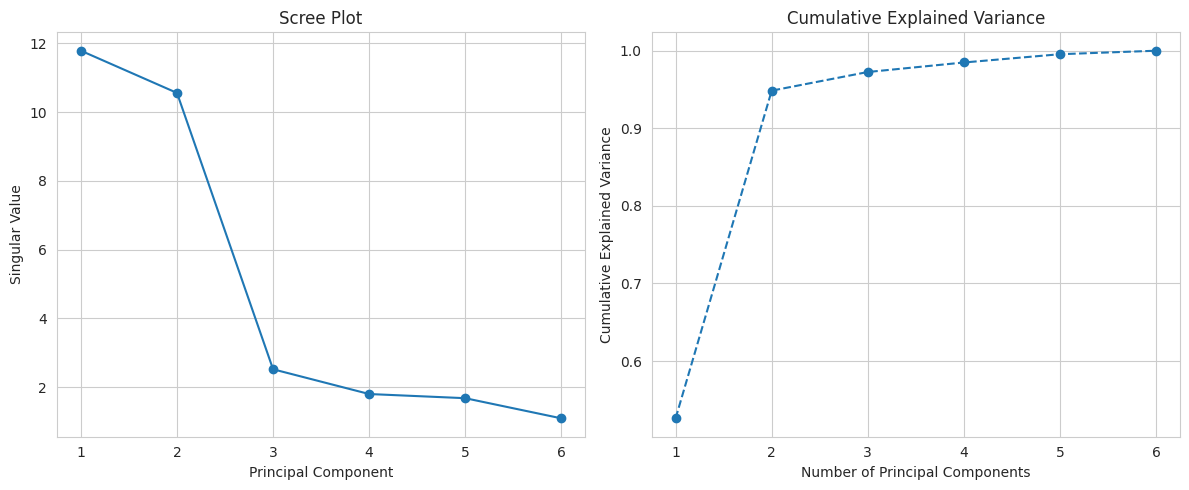

(array([0.52622329, 0.42229283, 0.0240403 , 0.012262  , 0.01066635,
        0.00451523]),
 array([0.52622329, 0.94851612, 0.97255642, 0.98481842, 0.99548477,
        1.        ]))

In [ ]:
import matplotlib.pyplot as plt

# Calculating the explained variance for each singular value
explained_variance = S ** 2 / np.sum(S ** 2) # what is it - ???

# Calculating the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Creating a scree plot and cumulative explained variance plot
plt.figure(figsize=(12, 5))

# Scree plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(S) + 1), S, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singular Value')

# Cumulative explained variance plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(S) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

(explained_variance, cumulative_explained_variance)


График осыпи: Строятся сингулярные значения (собственные значения). Мы наблюдаем, что первые два компонента имеют значительно более высокие сингулярные значения по сравнению с остальными.
Совокупная объясненная дисперсия: она содержит сводную информацию о том, насколько большая дисперсия объясняется первым

k компонентов. Эти значения являются:
1 компонент: 52,62%
2 компонента: 94,85%
3 компонента: 97,26%
4 компонента: 98,48%
5 компонентов: 99,55%
6 компонентов: 100%
Учитывая совокупную объясненную дисперсию, мы могли бы принять решение выбрать первые два основных компонента, поскольку они объясняют значительную часть (приблизительно 94,85%) общей дисперсии в данных.

In [ ]:
# Selecting the number of principal components to retain
k = 2

# Constructing Zk
Uk = U[:, :k]
Sk = np.diag(S[:k])
VTk = VT[:k, :]

# Calculating Zk
Zk = np.dot(Uk, np.dot(Sk, VTk))

# Calculating the approximation error in the spectral norm and Frobenius norm
error_spectral_norm = np.linalg.norm(data_z - Zk, ord=2)
error_frobenius_norm = np.linalg.norm(data_z - Zk, ord='fro')

print("Approximation error in the Spectral norm:", error_spectral_norm)
print("Approximation error in the Frobenius norm:", error_frobenius_norm)

# Displaying Zk and the approximation errors
Zk[:5, :]

Approximation error in the Spectral norm: 2.519253918041158
Approximation error in the Frobenius norm: 3.686698386484833


array([[ 0.99532856,  1.51081647,  1.25670403,  0.78561023,  1.3985354 ,
         1.4157968 ],
       [-0.64222305, -0.68016294, -0.19297055, -0.59425368, -0.29090176,
        -0.28465732],
       [ 0.00906882,  0.41925871,  0.86173391, -0.11304102,  0.8541968 ,
         0.87827332],
       [-0.84824472, -1.17091358, -0.82640492, -0.70409353, -0.94981712,
        -0.95764718],
       [-0.82295098, -0.81069453, -0.11962899, -0.77952695, -0.24644449,
        -0.23485203]])

Что касается ошибок аппроксимации:

Погрешность в норме спектральной матрицы составляет приблизительно
2.519
Погрешность в норме матрицы Фробениуса составляет приблизительно
3.687.

Синдикат с более низкой стоимостью дает лучшие приближения. Учитывая, что PCA - это метод уменьшения размерности с потерями, некоторая ошибка ожидаема и нормальна. Главное - найти баланс, при котором мы сохраняем в данных как можно больше важной информации, но при этом уменьшаем размерность.

7. Используя выделенные главные факторы, найти представления клиентов векторами меньшей размерности (размерности k) и построить карту клиентов. Сделать выводы о клиентах банка.


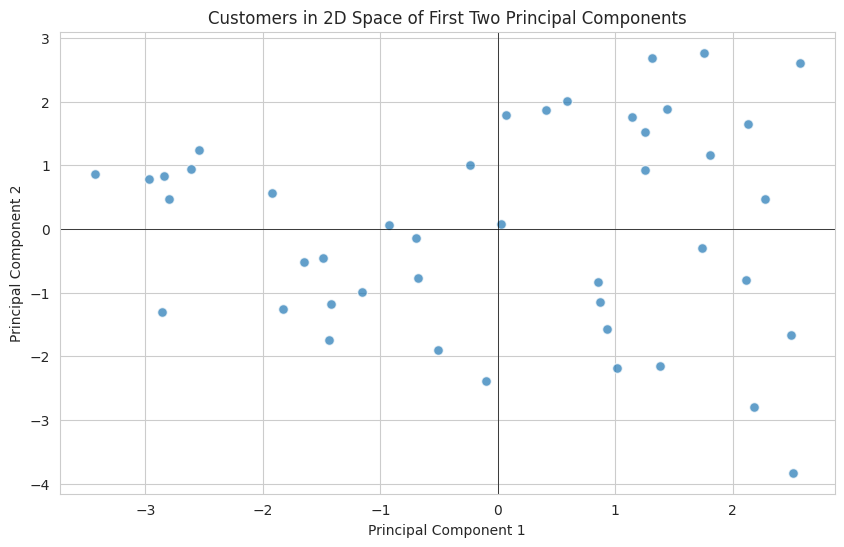

,PC1,PC2
0,-2.970374,0.779097
1,0.852469,-0.839284
2,-1.491390,-0.456065
3,2.110205,-0.797199
4,0.872537,-1.144997


In [ ]:
# Calculating the matrix T (customers in lower-dimensional space)
T = np.dot(Uk, Sk)

# Converting to DataFrame for better visualization and handling
T_df = pd.DataFrame(T, columns=[f"PC{i}" for i in range(1, k + 1)], index=data_no_outliers.index)

# Creating a scatter plot of the customers in the 2D space formed by the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(T_df['PC1'], T_df['PC2'], alpha=0.7, edgecolors='w', s=50)
plt.title('Customers in 2D Space of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

T_df.head()


Наблюдения:
Клиенты распределены по четырем квадрантам, что указывает на изменчивость данных о клиентах по измерениям, определенным PCA.
По-видимому, здесь нет четких кластеров; скорее, наблюдается разброс по обоим основным компонентам.
Последствия:
PC1: Клиенты значительно различаются по этому параметру, причем одни позиционируются положительно, а другие отрицательно. Это говорит о том, что первый основной компонент фиксирует значительные различия в данных о клиентах.
PC2: Вариации по этому измерению также заметны, хотя они кажутся немного менее рассеянными, чем PC1, подразумевая, что они отражают меньшую (но все же существенную) вариабельность.
Делать выводы:
Более тщательное изучение коэффициентов исходных переменных в этих двух основных компонентах могло бы выявить, какие потребительские атрибуты определяют изменчивость, наблюдаемую на точечной диаграмме.
Понимание природы этих основных компонентов может дать представление о различных клиентских сегментах или характеристиках, которые отличают клиентов в наборе данных банка.

##Снижение размерности. Интерпретация скрытых факторов.
8. Выписать матрицу коэффициентов разложения признаков zj по главным факторам. Исследовать структуру этой матрицы с целью выделения групп признаков тесно связанных с каждым из главных факторов.


In [ ]:
# Extracting the loadings for the first two principal components from VT
loadings = VTk.T

# Creating a DataFrame for better visualization and interpretation
loadings_df = pd.DataFrame(loadings, index=data_no_outliers.columns, columns=[f"PC{i}" for i in range(1, k + 1)])

# Displaying the loadings
loadings_df


,PC1,PC2
Age,-0.183182,0.579144
Number_of_Dependents,-0.403586,0.400482
Income,-0.494517,-0.272364
Residence_Length,-0.107374,0.598988
Car_Valuation,-0.517887,-0.179416
Loan_Amount,-0.528469,-0.197604


Толкование:
PC1:

Имеет сильную отрицательную нагрузку от Income, Car_Valuation и Loan_Amount.
Это может свидетельствовать о том, что PC1 относится к финансовому статусу или возможностям.
Клиенты с более высокими значениями в PC1, как правило, имеют более низкий доход, более низкую оценку автомобиля и меньшие суммы кредита.
PC2:

Имеет сильную положительную нагрузку от Residence_Length, а также положительную для Age и Number_of_Dependents.
Также обратите внимание, что Income и Car_Valuation имеют отрицательные нагрузки.
PC2 может быть интерпретирован как показатель стабильности или зрелости клиента.
Более высокие значения в PC2 указывают на более длительное проживание, пожилой возраст и большее количество иждивенцев, но потенциально более низкий доход и оценку автомобиля.
Предостережения:
Интерпретация основных компонентов требует знания предметной области и осторожности. Приведенные выше интерпретации основаны на гипотезах и нуждаются в дальнейшей проверке или исследовании для подтверждения. Кроме того, PCAS сконструированы таким образом, что каждый последующий компонент ортогонален предыдущим, поэтому PCs не могут быть коррелированы.

9. На основе анализа структуры матрицы коэффициентов разложения, предложить интерпретацию выделенным главным факторам. Дать интерпретацию построенной выше карте клиентов.


Интерпретация основных компонентов:
PC1 (Финансовое положение): Этот компонент, по-видимому, связан с финансовыми аспектами клиентов, поскольку он включает такие переменные, как доход, стоимость автомобиля и сумма кредита.
PC2 (стабильность/зрелость): Этот компонент может отражать аспекты стабильности или зрелости клиентов, поскольку он включает в себя продолжительность проживания, возраст и количество зависимых.
Интерпретация карты клиента:
Глядя на точечную диаграмму и принимая во внимание нашу интерпретацию ПК, мы могли бы сделать следующий вывод о клиентах банка:

Квадрант I (высокий уровень PC1, высокий уровень PC2): Клиентов здесь можно охарактеризовать как финансово скромных, но стабильных/зрелых. У них может быть более низкий доход и меньшие кредиты, но они долгое время проживают по месту жительства и, возможно, старше и имеют иждивенцев.

Квадрант II (низкий РС1, высокий РС2): Клиенты в этом квадранте могут испытывать финансовые трудности (низкий доход, низкая оценка автомобиля, высокие суммы кредитов), но все же демонстрируют стабильность / зрелость, проживая в течение длительного времени в своем регионе, возможно, будучи старше и имея иждивенцев.

Квадрант III (низкий PC1, низкий PC2): Этот квадрант может представлять клиентов, испытывающих финансовые трудности и потенциально менее стабильных/зрелых, с меньшим сроком проживания и, возможно, более молодых с меньшим количеством иждивенцев.

Квадрант IV (высокий уровень PC1, низкий уровень PC2): Клиенты здесь могут быть финансово обеспечены, но могут быть новичками в своем месте жительства, возможно, моложе и иметь меньше иждивенцев.

Последствия для бизнеса:
Стратегии таргетинга: Разные секторы могут представлять разные потребности и возможности клиентов, влияя на маркетинговые стратегии или стратегии таргетинга на продукт.
Оценка рисков: Понимание финансовых возможностей и стабильности клиентов может иметь решающее значение для оценки рисков в процессе утверждения кредита.
Обслуживание клиентов: Адаптация обслуживания клиентов и коммуникации с ними на основе вероятного жизненного этапа клиента и его финансового положения.
Заключительное примечание:
Эти интерпретации и выводы формируются на основе PCA и должны быть подтверждены и уточнены посредством дальнейшего анализа и понимания бизнеса. Более того, результаты PCA иногда чувствительны к данным, поэтому эти интерпретации могут изменяться с увеличением объема данных или с изменением сегментов клиентов.

## Снижение размерности. Метод MDS (Multidimensional Scaling = многомерное шкалирование)
10. Предложите способ вычисления расстояния между клиентами и вычислите матрицу расстояний.


В контексте клиентов и их атрибутов мы часто используем одну из следующих метрик расстояния для вычисления матрицы расстояний:

Евклидово расстояние: стандартная метрика расстояния, подходящая, когда все атрибуты находятся в одинаковых масштабах или были нормализованы.
Манхэттенское расстояние: Может быть полезно, если мы хотим рассчитать расстояние, которое проходит только по линиям сетки (горизонтальным и вертикальным).
Косинусное сходство: Часто используется в контексте многомерных разреженных данных (например, текстовых данных, представленных в виде векторов слов). Он измеряет косинус угла между двумя векторами, обеспечивая меру сходства.
Учитывая, что наши данные были нормализованы и являются плотными (не разреженными), евклидово расстояние может быть подходящим выбором для вычисления матрицы расстояний между клиентами. В качестве альтернативы, если мы считаем, что атрибуты могут не в равной степени влиять на расстояние, и хотим, чтобы метрика была более устойчивой к этому, можно выбрать расстояние Манхэттена.

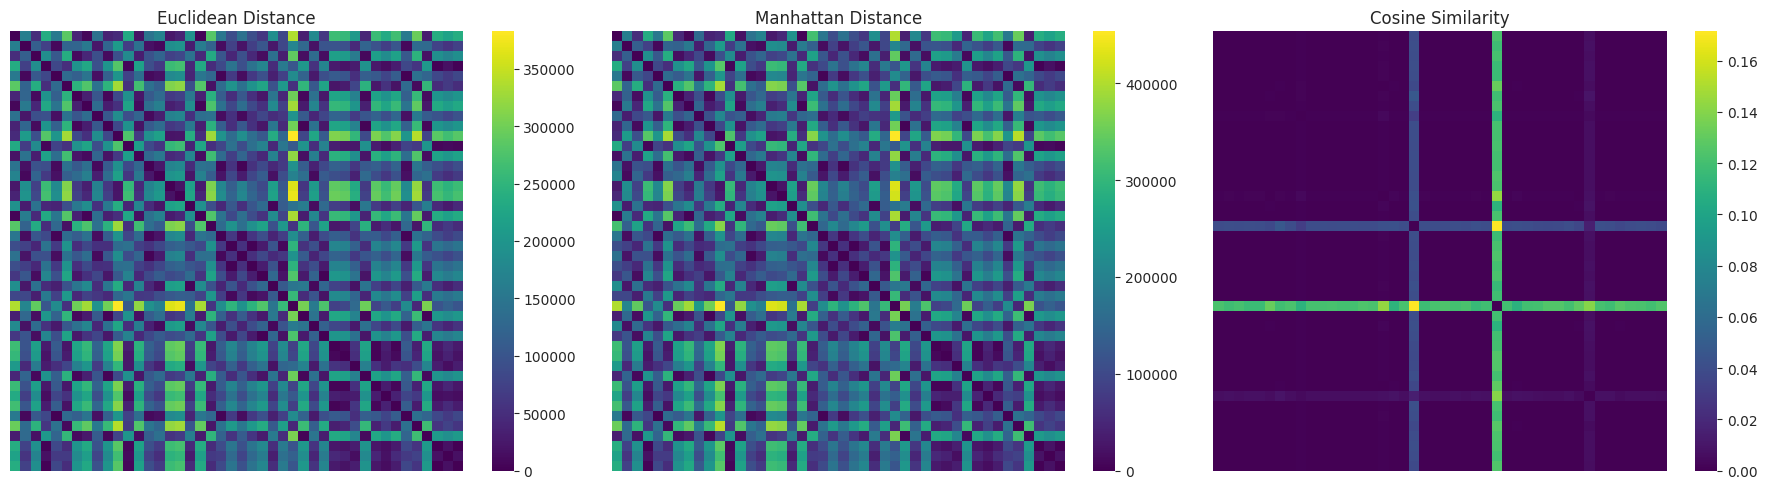

{'Euclidean Distance': array([[     0.        , 162534.18127659,  48425.20052617,
         235235.81824204, 154382.64247317],
        [162534.18127659,      0.        , 114110.29759513,
          72706.87755123,   8182.91862663],
        [ 48425.20052617, 114110.29759513,      0.        ,
         186813.51676471, 105957.53924568],
        [235235.81824204,  72706.87755123, 186813.51676471,
              0.        ,  80868.35005736],
        [154382.64247317,   8182.91862663, 105957.53924568,
          80868.35005736,      0.        ]]),
 'Manhattan Distance': array([[     0. , 192414.5,  57010. , 278720. , 182021. ],
        [192414.5,      0. , 135405.5,  86307.5,  10416.5],
        [ 57010. , 135405.5,      0. , 221710. , 125013. ],
        [278720. ,  86307.5, 221710. ,      0. ,  96709. ],
        [182021. ,  10416.5, 125013. ,  96709. ,      0. ]]),
 'Cosine Similarity': array([[0.00000000e+00, 4.05920231e-05, 3.12415813e-06, 7.43853856e-05,
         6.37481511e-05],
        [4.0

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import euclidean, cityblock, cosine
import seaborn as sns

# Using the data without outliers and with imputed values for calculations
data_clean = data_no_outliers.copy()

# Calculating distance matrices
distance_matrices = {
    'Euclidean Distance': squareform(pdist(data_clean, metric=euclidean)),
    'Manhattan Distance': squareform(pdist(data_clean, metric=cityblock)),
    'Cosine Similarity': squareform(pdist(data_clean, metric=cosine))
}

# Visualizing the distance matrices
plt.figure(figsize=(18, 5))

for i, (title, matrix) in enumerate(distance_matrices.items()):
    plt.subplot(1, 3, i+1)
    sns.heatmap(matrix, cmap='viridis', xticklabels=False, yticklabels=False)
    plt.title(title)

plt.tight_layout()
plt.show()

# Displaying a snippet of each distance matrix
{title: matrix[:5, :5] for title, matrix in distance_matrices.items()}


Приведенные выше тепловые карты представляют матрицы расстояний, вычисленные с использованием трех различных показателей: Евклидова расстояния, Манхэттенского расстояния и косинусного подобия. Цвет в каждой ячейке представляет расстояние между двумя клиентами: более темные цвета указывают на меньшие расстояния, в то время как более светлые цвета указывают на большие расстояния.

Наблюдения:
Евклидово и манхэттенское расстояние: более высокие значения указывают на большее расстояние между клиентами. Матрицы расстояний показывают, что есть пары клиентов, которые очень похожи (небольшое расстояние), и другие, которые совершенно разные (большое расстояние).
Косинусное сходство: меньшие значения указывают на большее сходство. Обратите внимание, что значения довольно малы, что указывает на то, что с точки зрения направленности в многомерном пространстве клиенты довольно похожи.

11. Проверьте, можно ли клиентов банка поместить в евклидово пространство размерности 2 с сохранением расстояний между клиентами.


Многомерное масштабирование (MDS) направлено на размещение объектов в низкоразмерном пространстве таким образом, чтобы расстояния между ними в этом пространстве были как можно ближе к их попарным расстояниям в исходном многомерном пространстве. Когда мы рассматриваем двумерное евклидово пространство, цель состоит в том, чтобы найти двумерное представление, которое сохраняет попарные расстояния.

Чтобы определить, возможно ли разместить клиентов в двумерном евклидовом пространстве с сохранением расстояний, мы применим классическую MDS к вычисленным нами матрицам расстояний и понаблюдаем, насколько хорошо результирующие двумерные представления сохраняют исходные расстояния. Обычно это оценивается визуально и/или путем сравнения значений напряжения.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_st

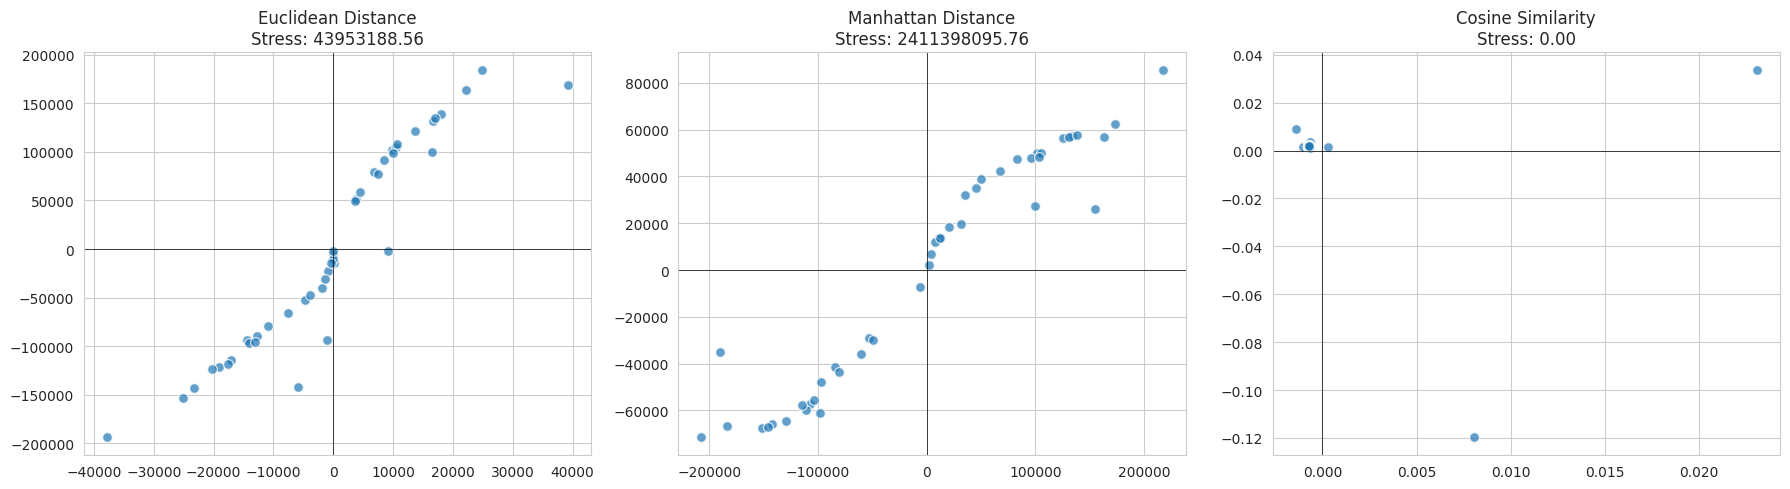

In [ ]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Function to perform MDS and plot the resulting 2D representation
def perform_mds_and_plot(distance_matrix, title, ax):
    mds_model = MDS(dissimilarity='precomputed', n_components=2, random_state=42)
    mds_fit = mds_model.fit(distance_matrix)
    mds_coords = mds_model.fit_transform(distance_matrix)
    stress = mds_fit.stress_

    ax.scatter(mds_coords[:, 0], mds_coords[:, 1], alpha=0.7, edgecolors='w', s=50)
    ax.set_title(f"{title}\nStress: {stress:.2f}")
    ax.grid(True)
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Performing MDS and plotting for each distance matrix
for i, (title, matrix) in enumerate(distance_matrices.items()):
    perform_mds_and_plot(matrix, title, axs[i])

plt.tight_layout()
plt.show()


Приведенные выше графики отображают 2D-вложения клиентов с использованием многомерного масштабирования (MDS) для каждой из матриц расстояний: Евклидово расстояние, Манхэттенское расстояние и косинусное сходство. Значение "напряжения", указанное в названии каждого подзаголовка, количественно определяет разницу между исходными расстояниями и расстояниями в пространстве с уменьшенной размерностью - более низкие значения напряжения указывают на лучшее сохранение исходных расстояний.

Наблюдения:
Все встраивания обеспечивают визуализацию в 2D, но значения напряжений различаются, что предполагает разный уровень точности при сохранении исходных расстояний.
Евклидово расстояние: относительно меньшее напряжение, предполагающее достойное представление в 2D.
Манхэттенское расстояние: более высокое напряжение по сравнению с евклидовым, что указывает на возможную потерю точности представления расстояния.
Косинусное сходство: умеренное напряжение, предполагающее, что двумерное представление может не сохранять косинусное сходство так же хорошо, как евклидовы расстояния.

Последствия:
2D-встраивания предоставляют способ визуализации отношений (расстояний) между клиентами, что может быть полезно для предварительного анализа данных и формирования гипотез о сегментах клиентов.
Выбор показателя расстояния может повлиять на результирующее 2D-представление и должен быть тщательно рассмотрен в контексте данных и бизнес-задачи.

следующие шаги:
Рассмотрите возможность использования этих 2D-встраиваний для дальнейшего анализа, например кластеризации, для изучения потенциальных клиентских сегментов.
Привлеките экспертов в предметной области для изучения и проверки потенциальных интерпретаций 2D-визуализаций.

12. Используйте любой из алгоритмов MDS для размещения объектов в евклидовом пространстве размерности 2. Оцените погрешность такого размещения. Постройте карту клиентов. Сравните с картой клиентов из п.7 и сделайте выводы.


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


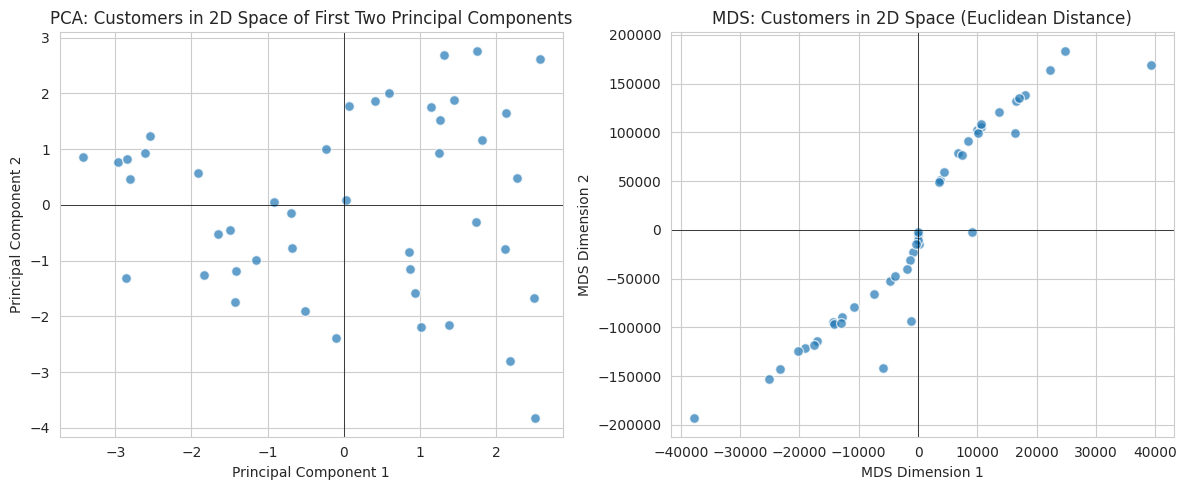

,PC1,PC2,MDS1,MDS2
0,-2.970374,0.779097,18083.278456,138811.547975
1,0.852469,-0.839284,-826.286148,-22595.141305
2,-1.491390,-0.456065,8439.402626,91228.644203
3,2.110205,-0.797199,-14415.770043,-94092.281956
4,0.872537,-1.144997,122.792811,-14496.592047


In [ ]:
# Extracting the MDS coordinates using Euclidean distance (due to its lower stress)
mds_model = MDS(dissimilarity='precomputed', n_components=2, random_state=42)
mds_coords = mds_model.fit_transform(distance_matrices['Euclidean Distance'])

# Creating a DataFrame for better handling
mds_df = pd.DataFrame(mds_coords, columns=['MDS1', 'MDS2'], index=data_no_outliers.index)

# Visualizing PCA (from step 7) and MDS (from step 11) side by side
plt.figure(figsize=(12, 5))

# PCA Visualization
plt.subplot(1, 2, 1)
plt.scatter(T_df['PC1'], T_df['PC2'], alpha=0.7, edgecolors='w', s=50)
plt.title('PCA: Customers in 2D Space of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# MDS Visualization
plt.subplot(1, 2, 2)
plt.scatter(mds_df['MDS1'], mds_df['MDS2'], alpha=0.7, edgecolors='w', s=50)
plt.title('MDS: Customers in 2D Space (Euclidean Distance)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

# Displaying first few rows of PCA and MDS coordinates
pd.concat([T_df.head(), mds_df.head()], axis=1)


Визуализации отображают клиентов в 2D-пространствах с использованием PCA (слева) и MDS (справа). Оба метода направлены на уменьшение размерности данных при сохранении определенных свойств. Вот несколько строк из преобразований PCA и MDS для справки:

Наблюдения и выводы:

    Визуализация: Хотя обе визуализации обеспечивают 2D-представление клиентов, они подчеркивают различные аспекты из-за природы PCA и MDS. PCA подчеркивает дисперсию, в то время как MDS подчеркивает сохранение исходных попарных расстояний.

    Масштабирование: Обратите внимание на различные масштабы осей между PCA и MDS, что указывает на различные акценты в представлении данных.

    Кластеры или выбросы: Визуальный осмотр может выявить кластеры или выбросы, которые могут быть подвергнуты дальнейшему анализу.

    Выводы:
PCA полезен, когда мы хотим понять дисперсию в данных и найти направления (основные компоненты), которые максимизируют ее.
MDS полезен, когда мы хотим сохранить попарные расстояния (различия) между наблюдениями, когда